In [1]:
import numpy as np
import math 
from scipy.special import comb
import matplotlib.pyplot as plt

In [2]:
def probability_p(N, i):
    if((N+i)%2 == 0 and (N-i)%2 == 0):
        val = math.factorial(N) / (math.factorial((N+i)//2) * math.factorial((N-i)//2) * pow(2,N)) 
    else:
        val = 0
    return val

In [3]:
def probability_p_vec(N, i):
    i = np.asarray(i)
    valid = (np.abs(i) <= N) & ((N + i) % 2 == 0)
    probs = np.zeros_like(i, dtype=float)
    k = (N + i[valid]) // 2
    probs[valid] = comb(N, k, exact=False) / np.exp2(N)
    return probs

In [4]:
def expectation_p_sqr_vec(N):
    i_values = np.arange(-N, N+1)     # all possible displacements
    probs = probability_p_vec(N, i_values)
    return np.sum((i_values**2) * probs)

In [5]:
def expectation_p_sqr(N):
    summation = 0
    for i in range (-N , N+1):
        summation = summation + (i*i * probability_p(N, i))

    return summation


In [6]:
Ns = np.arange(0, 1001)
expectations = np.array([expectation_p_sqr_vec(N) for N in Ns])
rms_values = np.sqrt(expectations)

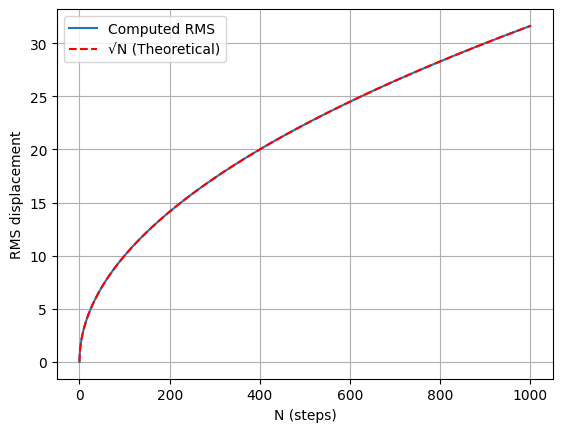

In [7]:
plt.plot(Ns, rms_values, label="Computed RMS")
plt.plot(Ns, np.sqrt(Ns), 'r--', label="√N (Theoretical)")
plt.xlabel("N (steps)")
plt.ylabel("RMS displacement")
plt.legend()
plt.grid(True)
plt.show()
